[View in Colaboratory](https://colab.research.google.com/github/marcelcerri/Ajuste-de-modelos-n-o-lineares/blob/master/Crescimento_microbiano_E_coli.ipynb)

**Integrando equações diferenciais e ajuste de pontos experimentais completo**

In [0]:
#Importação todos os pacotes utilizados
import pandas as pd
from google.colab import files
import io
from scipy import stats
from scipy.interpolate import *
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#carregar o arquivo em csv
uploaded = files.upload()

Saving crescimento_e_coli_2.csv to crescimento_e_coli_2.csv


In [3]:
#verificação do upload
for fn in uploaded.keys():
  print('O arquivo "{name}" com tamanho de {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
#transformando o arquivo csv em data frame
calibracao_df = pd.read_csv(io.StringIO(uploaded['crescimento_e_coli_2.csv'].decode('utf-8')))
#impressão do arquivo em data frame
calibracao_df

O arquivo "crescimento_e_coli_2.csv" com tamanho de 351 bytes


,tempo,concentracao_celular
0,0.0,0.100000
1,0.5,0.122140
2,1.0,0.149182
3,1.5,0.182212
4,2.0,0.222554
5,2.5,0.271828
6,3.0,0.332012
7,3.5,0.405520
8,4.0,0.495303
9,4.5,0.604965


In [4]:
#transformando data frame em vetor
calibracao_np = calibracao_df.values
#impressão do vetor
calibracao_np

array([[ 0.        ,  0.1       ],
       [ 0.5       ,  0.12214028],
       [ 1.        ,  0.14918247],
       [ 1.5       ,  0.18221188],
       [ 2.        ,  0.22255409],
       [ 2.5       ,  0.27182818],
       [ 3.        ,  0.33201169],
       [ 3.5       ,  0.40552   ],
       [ 4.        ,  0.49530324],
       [ 4.5       ,  0.60496475],
       [ 5.        ,  0.73890561],
       [ 5.5       ,  0.90250135],
       [ 6.        ,  1.10231764],
       [ 6.5       ,  1.3463738 ],
       [ 7.        ,  1.64446468],
       [ 7.5       ,  2.00855369],
       [ 8.        ,  2.45325302],
       [ 8.5       ,  2.99641   ],
       [ 9.        ,  3.65982344],
       [ 9.5       ,  4.47011845],
       [10.        ,  5.459815  ]])

In [5]:
#vetor do eixo x
t = calibracao_np[:,0]
print(t)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]


In [6]:
#vetor do eixo y
data_ca = calibracao_np[:,1]
print(data_ca)

[0.1        0.12214028 0.14918247 0.18221188 0.22255409 0.27182818
 0.33201169 0.40552    0.49530324 0.60496475 0.73890561 0.90250135
 1.10231764 1.3463738  1.64446468 2.00855369 2.45325302 2.99641
 3.65982344 4.47011845 5.459815  ]


In [0]:
def growth(Ca,t, mi):
  return mi*Ca

In [0]:
def y(t, mi, Ca0):
  y = odeint(growth, Ca0, t, args=(mi,))
  return y.ravel()

In [9]:
popt, cov = curve_fit(y, t, data_ca, [1, 1])
a_opt, y0_opt = popt
print(y)

<function y at 0x7fd8e7a9b2a8>


In [10]:
print("mi = %g" % a_opt)
print("Ca0 = %g" % y0_opt)

mi = 0.4
Ca0 = 0.1


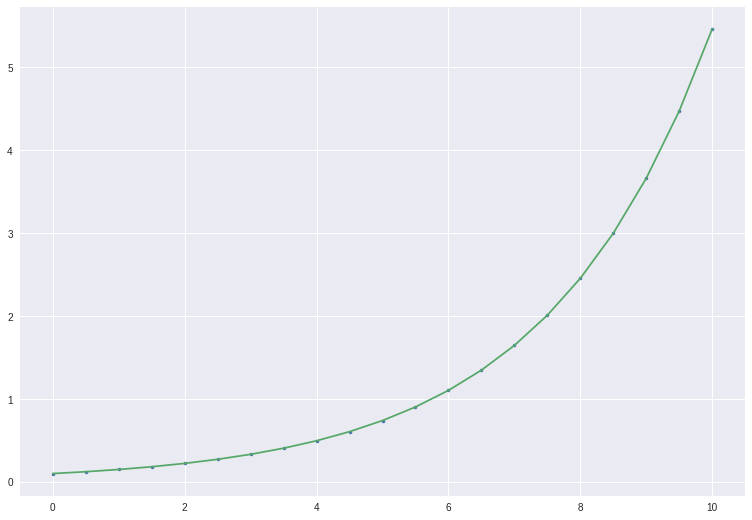

In [11]:
import matplotlib.pyplot as plt
plt.plot(t, data_ca, '.',
         t, y(t, a_opt, y0_opt), '-')
plt.gcf().set_size_inches(13, 9)
plt.savefig('out.png', dpi=100)
plt.show()
files.download( "out.png" )

In [12]:
y = odeint(growth, y0_opt, t, args=(a_opt,))
#guardando as informações e salvando em txt
data = np.vstack((t, y.T))
data = data.T
print(data)

[[ 0.          0.1       ]
 [ 0.5         0.12214028]
 [ 1.          0.14918247]
 [ 1.5         0.18221188]
 [ 2.          0.22255409]
 [ 2.5         0.27182819]
 [ 3.          0.3320117 ]
 [ 3.5         0.40551999]
 [ 4.          0.49530324]
 [ 4.5         0.60496475]
 [ 5.          0.73890561]
 [ 5.5         0.90250135]
 [ 6.          1.10231764]
 [ 6.5         1.3463738 ]
 [ 7.          1.64446467]
 [ 7.5         2.0085537 ]
 [ 8.          2.45325302]
 [ 8.5         2.99641   ]
 [ 9.          3.65982345]
 [ 9.5         4.47011845]
 [10.          5.459815  ]]


In [26]:
#salvando em csv
df = pd.DataFrame(data)
df.to_csv("data.csv")
files.download('data.csv')
print(df)

       0         1
0    0.0  0.100000
1    0.5  0.122140
2    1.0  0.149182
3    1.5  0.182212
4    2.0  0.222554
5    2.5  0.271828
6    3.0  0.332012
7    3.5  0.405520
8    4.0  0.495303
9    4.5  0.604965
10   5.0  0.738906
11   5.5  0.902501
12   6.0  1.102318
13   6.5  1.346374
14   7.0  1.644465
15   7.5  2.008554
16   8.0  2.453253
17   8.5  2.996410
18   9.0  3.659823
19   9.5  4.470118
20  10.0  5.459815
